# Group F

Groupmembers are:


|Gender|Firstname|Surname|Email| Study program| Semester| Student ID|
|:----:|:--------|:------|:----|:----------|:------------|:--------|
| f | Cam Van | Tran Thi | cam.tranthi@student.uni-siegen.de | HCI | 4 | 1542660 |
| f |.....|.....|.....| HCI |.....|.....|
| m |.....|.....|.....| HCI |.....|.....|

    
**Course**: First steps into Artificial Intelligence: Organization & Introduction

**Examiner**: Prof. Dr. Thomas Ludwig

**Semester**: Summersemester 2022

**Submission date**: 31. July 2022

**City**: Siegen, Germany


## Imports
Following imports and addtional installtions are needed:

In [1]:
# If there are additional libraries needed to run the following code install them here


In [2]:
# list all needed imports here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## TODO: Predict price using other characteristics (cut, carat, color, etc)
...determine the cut based on the diamond characteristics (including price). Only if the price is approximately correct and the cut can be predicted correctly, the owner considers the price of the diamond to be fair and buys it.

### DATASET DESCRIPTION

**price** price in US dollars (\$ 326 --\$18,823)

**carat** weight of the diamond (0.2--5.01)

**cut** quality of the cut (Fair, Good, Very Good, Premium, Ideal)

**color** diamond colour, from J (worst) to D (best)

**clarity** a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

**x** length in mm (0--10.74)

**y** width in mm (0--58.9)

**z** depth in mm (0--31.8)

**depth** total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

**table** width of top of diamond relative to widest point (43--95)

In [48]:
# This is how the data needs to be inserted!

datapath = "data/diamonds_FSAI_SoSe22.csv"
raw_df = pd.read_csv(datapath, index_col = 0)
raw_df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.83,Premium,F,VS2,60.2,60.0,3495,6.09,6.04,3.65
1,1.25,Premium,H,SI1,60.7,58.0,5027,7.04,6.99,4.26
2,0.41,Premium,D,SI1,60.5,60.0,791,4.77,4.81,2.90
3,0.31,Good,H,VS2,63.1,57.0,489,4.28,4.31,2.71
4,0.30,Ideal,G,IF,62.2,55.0,844,4.30,4.32,2.68
...,...,...,...,...,...,...,...,...,...,...
45844,0.44,Premium,G,SI1,61.1,59.0,990,4.90,4.86,2.98
45845,1.52,Good,J,VVS2,57.9,62.0,8861,7.61,7.63,4.41
45846,1.00,Good,F,VS2,61.1,61.0,6841,6.38,6.45,3.92
45847,0.32,Good,J,SI1,63.2,56.0,374,4.31,4.36,2.74


In [15]:
raw_df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [16]:
raw_df.T

,0,1,2,3,4,5,6,7,8,9,...,45839,45840,45841,45842,45843,45844,45845,45846,45847,45848
carat,0.83,1.25,0.41,0.31,0.3,0.41,0.55,0.25,0.3,0.29,...,0.34,1.02,1.0,0.31,1.11,0.44,1.52,1.0,0.32,0.41
cut,Premium,Premium,Premium,Good,Ideal,Ideal,Ideal,Ideal,Premium,Very Good,...,Premium,Ideal,Fair,Ideal,Premium,Premium,Good,Good,Good,Ideal
color,F,H,D,H,G,F,H,G,H,F,...,D,F,H,E,G,G,J,F,J,E
clarity,VS2,SI1,SI1,VS2,IF,VVS2,VVS2,VS2,VS2,VS1,...,VS2,SI2,SI2,SI1,SI1,SI1,VVS2,VS2,SI1,VVS2
depth,60.2,60.7,60.5,63.1,62.2,62.3,61.9,61.4,62.6,59.1,...,60.4,61.4,66.1,62.7,62.3,61.1,57.9,61.1,63.2,61.8
table,60.0,58.0,60.0,57.0,55.0,56.0,56.0,57.0,58.0,60.0,...,60.0,56.0,56.0,54.0,58.0,59.0,62.0,61.0,56.0,57.0
price,3495,5027,791,489,844,1115,1668,459,608,504,...,1033,4578,2856,544,5408,990,8861,6841,374,1243
x,6.09,7.04,4.77,4.28,4.3,4.73,5.22,4.08,4.28,4.33,...,4.56,6.47,6.21,4.35,6.61,4.9,7.61,6.38,4.31,4.8
y,6.04,6.99,4.81,4.31,4.32,4.77,5.25,4.1,4.22,4.36,...,4.51,6.5,5.97,4.36,6.52,4.86,7.63,6.45,4.36,4.75
z,3.65,4.26,2.9,2.71,2.68,2.96,3.24,2.51,2.66,2.57,...,2.74,3.98,4.04,2.73,4.09,2.98,4.41,3.92,2.74,2.95


In [17]:
raw_df.values[0]

array([0.83, 'Premium', 'F', 'VS2', 60.2, 60.0, 3495, 6.09, 6.04, 3.65],
      dtype=object)

In [19]:
raw_df.iloc[0]

carat         0.83
cut        Premium
color            F
clarity        VS2
depth         60.2
table         60.0
price         3495
x             6.09
y             6.04
z             3.65
Name: 0, dtype: object

In [20]:
raw_df.loc[0]

carat         0.83
cut        Premium
color            F
clarity        VS2
depth         60.2
table         60.0
price         3495
x             6.09
y             6.04
z             3.65
Name: 0, dtype: object

In [4]:
raw_df.shape

(45849, 10)

In [24]:
len(raw_df)

45849

In [5]:
# check the general information of the dataset
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45849 entries, 0 to 45848
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    45849 non-null  float64
 1   cut      45849 non-null  object 
 2   color    45849 non-null  object 
 3   clarity  45849 non-null  object 
 4   depth    45849 non-null  float64
 5   table    45849 non-null  float64
 6   price    45849 non-null  int64  
 7   x        45849 non-null  float64
 8   y        45849 non-null  float64
 9   z        45849 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.8+ MB


#### 'cut', 'color' and 'clarity' are categorical variables, the rest are numerical variables.

In [6]:
raw_df.describe()

,carat,depth,table,price,x,y,z
count,45849.000000,45849.000000,45849.000000,45849.000000,45849.000000,45849.000000,45849.000000
mean,0.797251,61.749371,57.456823,3925.804772,5.729115,5.732836,3.537766
std,0.473729,1.436693,2.234886,3982.937163,1.122093,1.147394,0.707841
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,948.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2398.000000,5.700000,5.710000,3.520000
75%,1.040000,62.500000,59.000000,5327.000000,6.540000,6.540000,4.030000
max,5.010000,79.000000,95.000000,18818.000000,10.740000,58.900000,31.800000


In [14]:
raw_df.values

array([[0.83, 'Premium', 'F', ..., 6.09, 6.04, 3.65],
       [1.25, 'Premium', 'H', ..., 7.04, 6.99, 4.26],
       [0.41, 'Premium', 'D', ..., 4.77, 4.81, 2.9],
       ...,
       [1.0, 'Good', 'F', ..., 6.38, 6.45, 3.92],
       [0.32, 'Good', 'J', ..., 4.31, 4.36, 2.74],
       [0.41, 'Ideal', 'E', ..., 4.8, 4.75, 2.95]], dtype=object)

In [7]:
raw_df['price'].describe()

count    45849.000000
mean      3925.804772
std       3982.937163
min        326.000000
25%        948.000000
50%       2398.000000
75%       5327.000000
max      18818.000000
Name: price, dtype: float64

In [8]:
raw_df.notnull()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...
45844,True,True,True,True,True,True,True,True,True,True
45845,True,True,True,True,True,True,True,True,True,True
45846,True,True,True,True,True,True,True,True,True,True
45847,True,True,True,True,True,True,True,True,True,True


#### the dataset has no null values => no need to process missing or unknown data

In [9]:
len(raw_df)-len(raw_df.dropna())

0

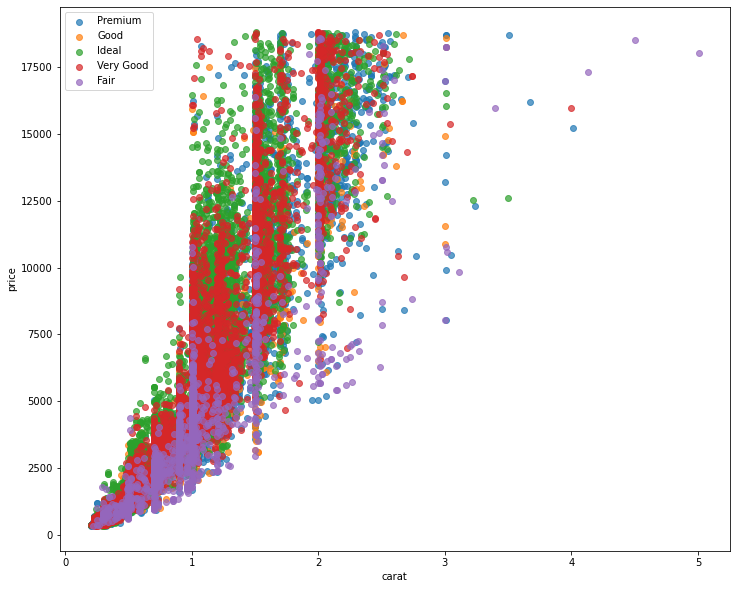

In [53]:
plt.figure(figsize=(12,10))
#begin for
for cut in raw_df["cut"].unique():
    #print(cut)
    cut_df = raw_df[raw_df["cut"] == cut]
        
    plt.scatter(x=cut_df["carat"],
                y=cut_df["price"],
                alpha=0.7,
                label=cut)

plt.xlabel("carat")
plt.ylabel("price")
plt.legend()
plt.show()

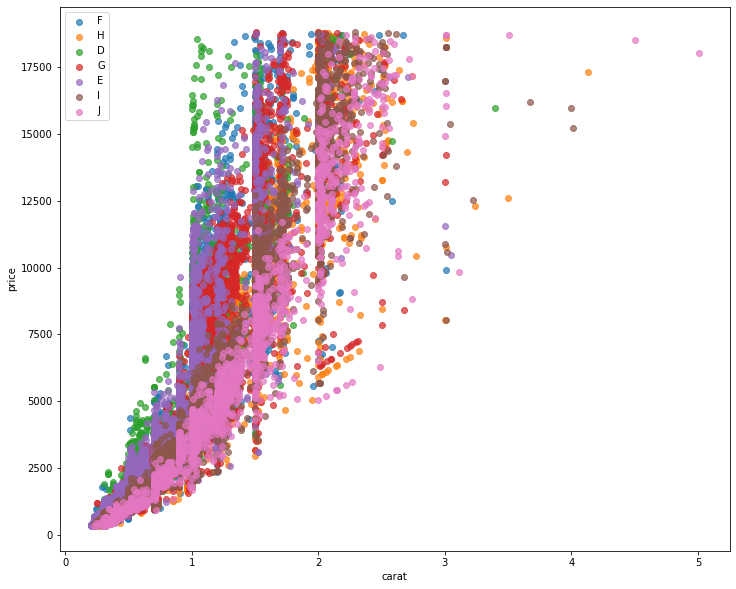

In [62]:
plt.figure(figsize=(12,10))
#begin for
for color in raw_df["color"].unique():
    #print(color)
    color_df = raw_df[raw_df["color"] == color]
        
    plt.scatter(x=color_df["carat"],
                y=color_df["price"],
                alpha=0.7,
                label=color)

plt.xlabel("carat")
plt.ylabel("price")
plt.legend()
plt.show()

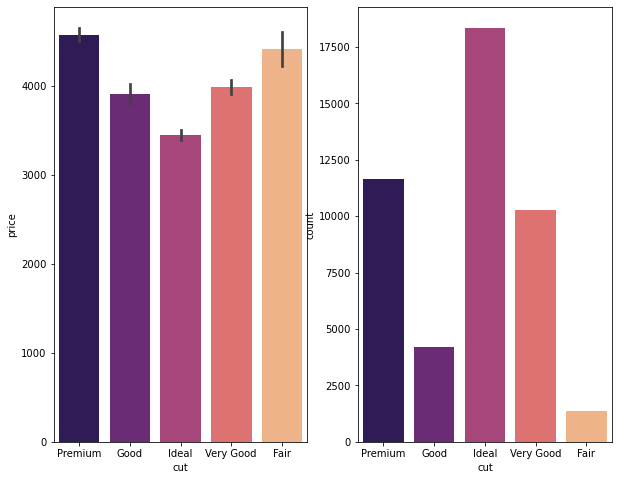

In [92]:
f, axes = plt.subplots(1, 2, figsize=(10, 8)) #sharey=True

#barplots: show the mean values of each type of cut
sns.barplot(x="cut",y="price",data=raw_df, ax=axes[0], palette="magma")

#countplots: count the numbers of each type of cut
sns.countplot(x="cut",data=raw_df, ax=axes[1], palette="magma")

plt.show()

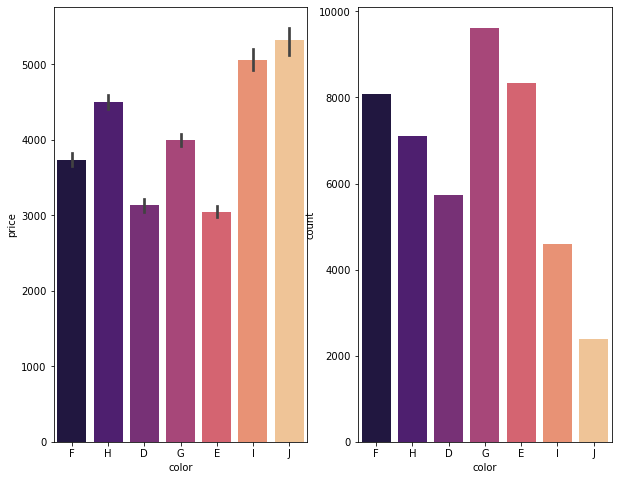

In [93]:
f, axes = plt.subplots(1, 2, figsize=(10, 8)) #sharey=True

#barplots
sns.barplot(x="color",y="price",data=raw_df, ax=axes[0], palette="magma")

#countplots
sns.countplot(x="color",data=raw_df, ax=axes[1], palette="magma")

plt.show()

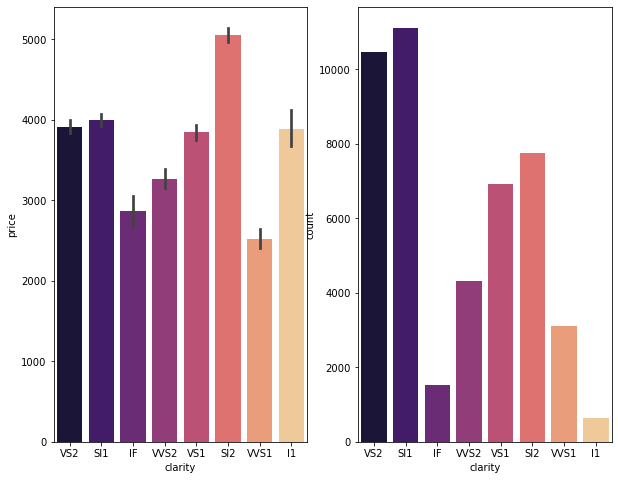

In [101]:
f, axes = plt.subplots(1, 2, figsize=(10, 8)) #sharey=True

#barplots
sns.barplot(x="clarity",y="price",data=raw_df, ax=axes[0], palette="magma")

#countplots
sns.countplot(x="clarity",data=raw_df, ax=axes[1], palette="magma")

plt.show()

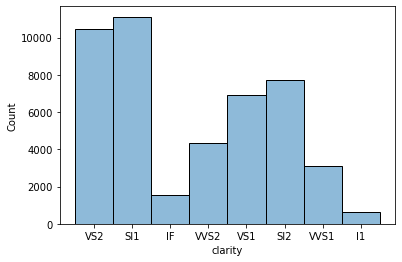

In [96]:
# histplot or displot: show the numbers of each type of clarity
sns.histplot(raw_df["clarity"], bins=10, alpha=0.5)
plt.show()

In [66]:
cut_group = raw_df.groupby('cut').count()
cut_group

,carat,color,clarity,depth,table,price,x,y,z
cut,,,,,,,,,
Fair,1378,1378,1378,1378,1378,1378,1378,1378,1378
Good,4194,4194,4194,4194,4194,4194,4194,4194,4194
Ideal,18350,18350,18350,18350,18350,18350,18350,18350,18350
Premium,11645,11645,11645,11645,11645,11645,11645,11645,11645
Very Good,10282,10282,10282,10282,10282,10282,10282,10282,10282


In [77]:
cut_group = raw_df.groupby('cut').mean()
cut_group

,carat,depth,table,price,x,y,z
cut,,,,,,,
Fair,1.051190,64.050581,59.035704,4410.547896,6.254078,6.188911,3.988157
Good,0.847098,62.387315,58.686457,3908.639723,5.832616,5.844475,3.637883
Ideal,0.702302,61.707662,55.953951,3449.582888,5.505866,5.518917,3.400319
Premium,0.890653,61.257492,58.744319,4573.855045,5.971126,5.942686,3.645304
Very Good,0.806552,61.812264,57.967623,3983.783797,5.740875,5.770282,3.560073


In [67]:
type(cut_group)

pandas.core.frame.DataFrame

In [69]:
color_group = raw_df.groupby('color').count()
color_group

,carat,cut,clarity,depth,table,price,x,y,z
color,,,,,,,,,
D,5729,5729,5729,5729,5729,5729,5729,5729,5729
E,8339,8339,8339,8339,8339,8339,8339,8339,8339
F,8085,8085,8085,8085,8085,8085,8085,8085,8085
G,9623,9623,9623,9623,9623,9623,9623,9623,9623
H,7094,7094,7094,7094,7094,7094,7094,7094,7094
I,4589,4589,4589,4589,4589,4589,4589,4589,4589
J,2390,2390,2390,2390,2390,2390,2390,2390,2390
